# Assignment 1 (Coding Part)

- Implement the required code for each problem in the allocated area.
- Write down your comments clearly.
- Please submit your notebook with outputs displayed.

In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt

## Exercise 1.10

In [2]:
def flip_coin():
    # TODO: add fair coin flipping experiment code
    coin_flips=np.zeros((1000, 10))
    # Run a computer simulation for flipping 1,000 fair coins. 
    for coin in range(1000):
        # Flip each coin independently 10 times
        # Let Head =1 & Tail=0
        flips = np.random.randint(2, size=10)
        coin_flips[coin]=flips

    # First Coin
    v_1=np.mean(coin_flips[0])

    # Random Coin
    random_number = random.randint(0, 999)
    v_rand=np.mean(coin_flips[random_number])

    # Min no of heads
    total_no_heads=np.sum(coin_flips,axis=1)
    # The first min is returned
    index_min_heads = np.argmin(total_no_heads)
    # print("min",total_no_heads[index_min_heads])
    v_min=np.mean(coin_flips[index_min_heads])
    return v_1,v_rand,v_min

In [5]:
flip_coin()

(0.7, 0.7, 0.1)

### Exercise 1.10 (a)

In [46]:
# TODO: add solution for point a
# This is a fair coin so we need the population mean is 0.5 😀
mu_1 = 0.5
mu_rand = 0.5
mu_min = 0.5

### Exercise 1.10 (b)

In [76]:
# TODO: add solution for point b
# 100,000 runs of the entire experiment
v_1_hist=[]
v_rand_hist=[]
v_min_hist=[]
for i in range(100000):
    v_1,v_rand,v_min=flip_coin()
    v_1_hist.append(v_1)
    v_rand_hist.append(v_rand)
    v_min_hist.append(v_min)


# Draw Histogram
def draw_hist(values, title="", ax=None):
    # Plotting the histogram on the provided axis
    ax.hist(values, bins=np.linspace(0, 1, num=11), edgecolor='black')
    ax.set_xlabel('Sample Mean of getting head')
    ax.set_ylabel('Frequency')
    ax.set_title('Histogram for ' + str(len(values)) + ' experiments [' + str(title) + ']')


# Create subplots for each value
fig, axs = plt.subplots(1, 3, figsize=(18, 5))

# Draw Histograms
draw_hist(values=v_1_hist, title='First', ax=axs[0])
draw_hist(values=v_rand_hist, title='Random', ax=axs[1])
draw_hist(values=v_min_hist, title='Min', ax=axs[2])

plt.tight_layout()
plt.show()

KeyboardInterrupt: 

### Exercise 1.10 (c)

In [75]:
# TODO: add solution for point c
# Define the range of epsilon values
epsilons = np.linspace(0, 1, num=100)


[0.8512008  0.71762788 0.74399045 0.51032411 0.69368615 0.68424265
 0.2129785  0.90385301 0.23569089 0.32346269]


### Exercise 1.10 (d)

In [5]:
# TODO: add solution for point d

### Exercise 1.10 (e)

In [6]:
# TODO: add solution for point e

## Problem 1.4

In [7]:
import random
import numpy as np
import matplotlib.pyplot as plt

### Problem 1.4 (a)

In [8]:
def generate_dataset(n,dim,target_func,min=-50,max=50):
    # TODO: add dataset generation code
    data_set_features=[]
    data_set_labels=[]

    # Generate Random Data points [min,max]
    random_data=np.random.rand(n, dim) *  (max - min) + min

    # Get Gold Labels for data points
    for data_point in random_data:
        # Perceptron Eq sign(WT.x)
        # SubStitute by Vector in Target Equation to
        y=np.sign(np.dot(target_func.T,np.insert(data_point, 0, 1)).squeeze())

        data_set_features.append(tuple(data_point))
        data_set_labels.append(y)
    return data_set_features,data_set_labels

def generate_rand_func(d):
    # Generate Random Weights [-1,-1]   [0-1]*2-1=[-1,1]
    return np.array([np.random.rand()*2-1 for _ in range(d+1)]).reshape(-1,1)

In [9]:
def plot_classifier(x_min,x_max,weights,label,color="green",style="--"):
    # Plot Target Function
    # w0+w1*x1+w2*x2=0
    x_line = np.linspace(x_min,x_max, 100)
    # Calculate corresponding y values using the line equation
    y_line = (-weights[0] - weights[1] * x_line) / weights[2]

    # Plot the line
    plt.plot(x_line, y_line, color=color, linestyle=style, label=label)

def plot_data_points(features,labels):
    color_map = {-1: 'red', 1: 'green'}

    # Plot DataPoints
    for label in set(labels):
        indices = [i for i, l in enumerate(labels) if l == label]
        plt.scatter([features[i][0] for i in indices], [features[i][1] for i in indices], label=label, color=color_map[label], s=50, alpha=0.7)

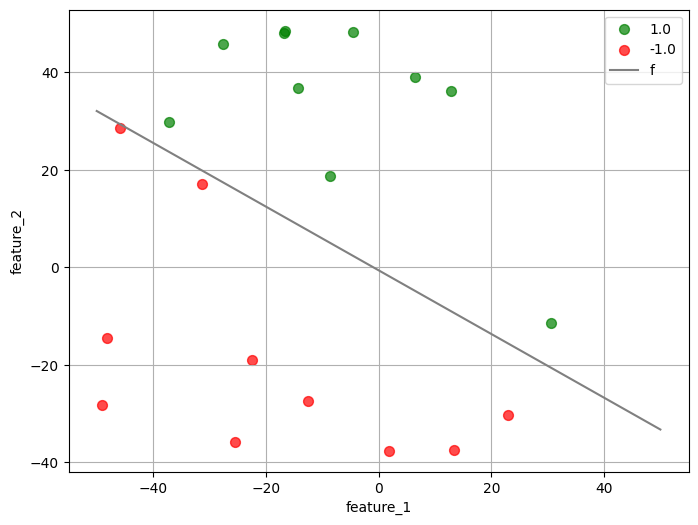

In [10]:
dim=2
target_func_w=generate_rand_func(d=dim)
data_set_features,data_set_labels=generate_dataset(n=20,dim=dim,target_func=target_func_w)

plt.figure(figsize=(8, 6))

# Plot Data Points
plot_data_points(data_set_features,data_set_labels)

# Plot Target Classifier
plot_classifier(x_min=-50,x_max=50,weights=target_func_w,label="f",color="grey",style="-")


# Add labels and title
plt.xlabel('feature_1')
plt.ylabel('feature_2')

# Add legend
plt.legend()

# Show plot
plt.grid(True)
plt.show()

### Problem 1.4 (b)

Total Updates Before Convergence 8


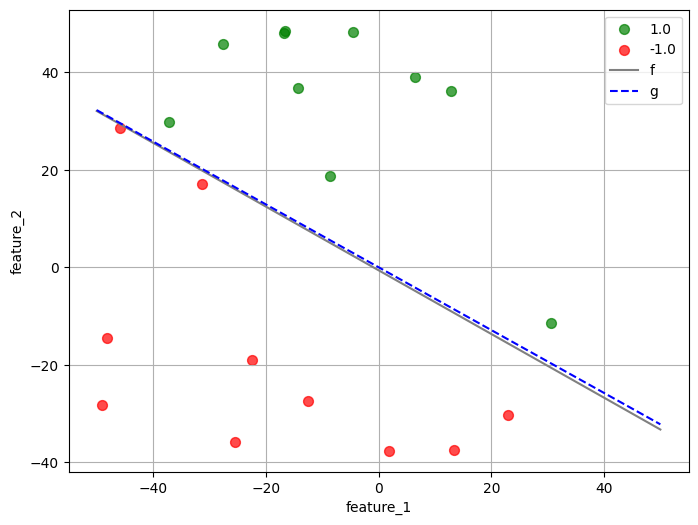

In [11]:
def run_perceptron_learning(features,labels):
    # TODO: add perceptron learning algorithm code
    n_updates=0
    dim=np.shape(features[0])[0]
    # Init weights by 0
    w=np.zeros((dim+1,1))
    while True:
        n_changes=0
        for i,x in enumerate(features):
            x = list(x)
            x.insert(0, 1)
            if labels[i]*(np.sign(np.dot(w.T,x))).squeeze()<=0:
                # Misclassified --> Update Weights
                w=(w.T+labels[i]*np.array(x)).T
                n_changes=n_changes+1
                n_updates=n_updates+1
        if n_changes==0:
            break
    return w,n_updates

def plot_q_1_4(data_set_features,data_set_labels,target_func_w):
    # Plotting
    plt.figure(figsize=(8, 6))

    # Plot Data Points
    plot_data_points(data_set_features,data_set_labels)
    # Plot Target Classifier
    plot_classifier(x_min=-50,x_max=50,weights=target_func_w,label="f",color="grey",style="-")
    # Plot Hypothesis Classifier
    plot_classifier(x_min=-50,x_max=50,weights=w,label="g",color="blue",style="--")

    # Add labels and title
    plt.xlabel('feature_1')
    plt.ylabel('feature_2')

    # Add legend
    plt.legend()

    # Show plot
    plt.grid(True)
    plt.show()


w,n_updates=run_perceptron_learning(features=data_set_features,labels=data_set_labels)
print("Total Updates Before Convergence",n_updates)

# Plot
plot_q_1_4(data_set_features,data_set_labels,target_func_w)


In [12]:
# TODO: add solution for the rest of the point
# Q: Comment on whether f is close to g?
print("A: Yes it is clear that they are very close")

A: Yes it is clear that they are very close


### Problem 1.4 (c)

Total Updates Before Convergence 1


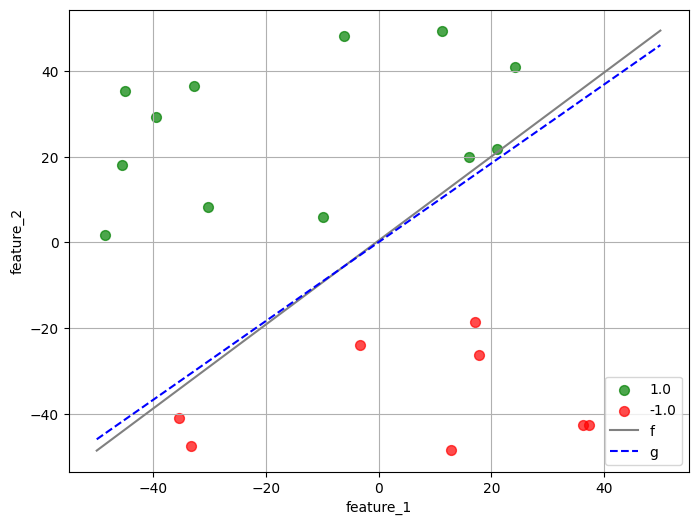

In [13]:
# TODO: add solution for point c
dim=2
n_points=20
target_func_w=generate_rand_func(d=dim)
data_set_features,data_set_labels=generate_dataset(n=n_points,dim=dim,target_func=target_func_w)

w,n_updates=run_perceptron_learning(features=data_set_features,labels=data_set_labels)
print("Total Updates Before Convergence",n_updates)

plot_q_1_4(data_set_features,data_set_labels,target_func_w)

In [14]:
# Q: Comment on whether f is close to g?
print("A: Yes it is clear that they are very close They are Nearly the Same.\nNotice the difference between 2 lines here and in b although same no of points are used")

A: Yes it is clear that they are very close They are Nearly the Same.
Notice the difference between 2 lines here and in b although same no of points are used


### Problem 1.4 (d)

Total Updates Before Convergence 22


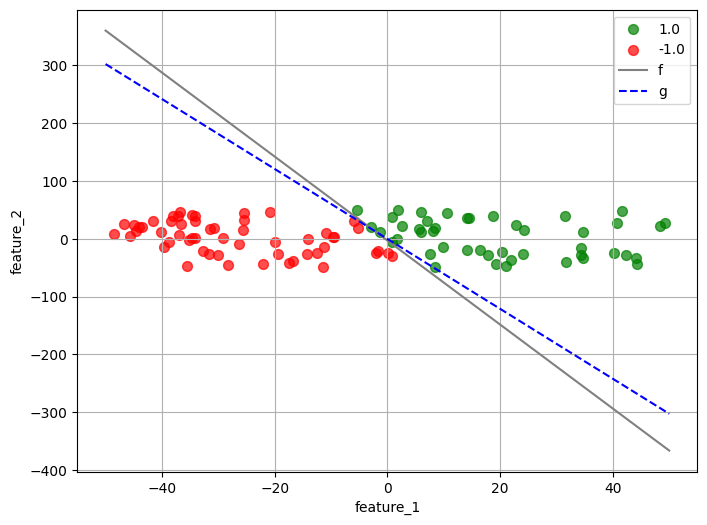

In [15]:
# TODO: add solution for point d
dim=2
n_points=100
target_func_w=generate_rand_func(d=dim)
data_set_features,data_set_labels=generate_dataset(n=n_points,dim=dim,target_func=target_func_w)

w,n_updates=run_perceptron_learning(features=data_set_features,labels=data_set_labels)
print("Total Updates Before Convergence",n_updates)

plot_q_1_4(data_set_features,data_set_labels,target_func_w)

In [16]:
# Q: Comment on whether f is close to g?
print("A: Yes it is clear that they are very close.\nNearly like case of (b)")

A: Yes it is clear that they are very close.
Nearly like case of (b)


### Problem 1.4 (e)

Total Updates Before Convergence 2595


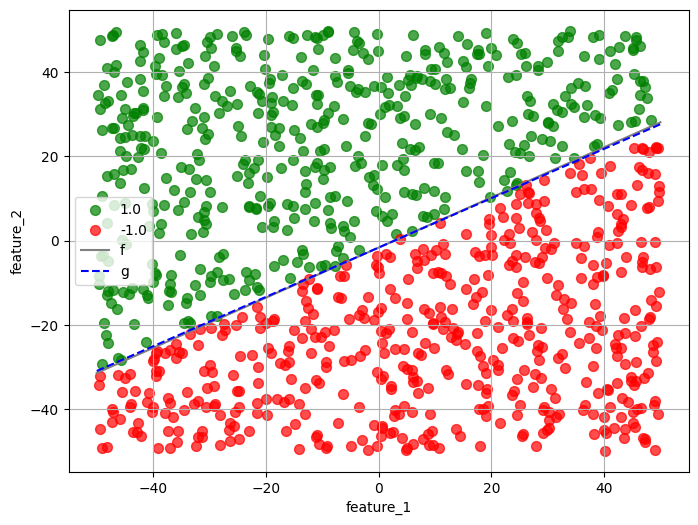

In [17]:
# TODO: add solution for point e
dim=2
n_points=1000
target_func_w=generate_rand_func(d=dim)
data_set_features,data_set_labels=generate_dataset(n=n_points,dim=dim,target_func=target_func_w)

w,n_updates=run_perceptron_learning(features=data_set_features,labels=data_set_labels)
print("Total Updates Before Convergence",n_updates)

plot_q_1_4(data_set_features,data_set_labels,target_func_w)

In [18]:
# Q: Comment on whether f is close to g?
print("A: Yes it is clear that they are very close.They are nearly the same")

A: Yes it is clear that they are very close.They are nearly the same


### Problem 1.4 (f)

In [19]:
# TODO: add solution for point c
dim=10
n_points=1000
target_func_w=generate_rand_func(d=dim)
data_set_features,data_set_labels=generate_dataset(n=n_points,dim=dim,target_func=target_func_w)

w,n_updates=run_perceptron_learning(features=data_set_features,labels=data_set_labels)
print("Total Updates Before Convergence",n_updates)

Total Updates Before Convergence 4883


### Problem 1.4 (g)

Running Experiment 1
Running Experiment 2
Running Experiment 3
Running Experiment 4
Running Experiment 5
Running Experiment 6
Running Experiment 7
Running Experiment 8
Running Experiment 9
Running Experiment 10
Running Experiment 11
Running Experiment 12
Running Experiment 13
Running Experiment 14
Running Experiment 15
Running Experiment 16
Running Experiment 17
Running Experiment 18
Running Experiment 19
Running Experiment 20
Running Experiment 21
Running Experiment 22
Running Experiment 23
Running Experiment 24
Running Experiment 25
Running Experiment 26
Running Experiment 27
Running Experiment 28
Running Experiment 29
Running Experiment 30
Running Experiment 31
Running Experiment 32
Running Experiment 33
Running Experiment 34
Running Experiment 35
Running Experiment 36
Running Experiment 37
Running Experiment 38
Running Experiment 39
Running Experiment 40
Running Experiment 41
Running Experiment 42
Running Experiment 43
Running Experiment 44
Running Experiment 45
Running Experiment 

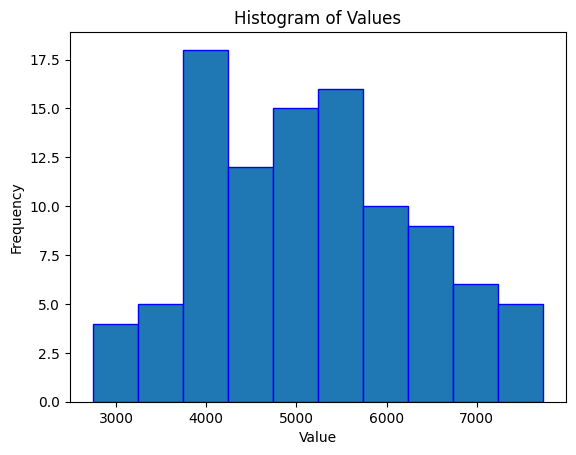

In [20]:
def plot_hist(values):
    # Plotting the histogram
    plt.hist(values, bins=range(min(values), max(values) + 500, 500), edgecolor='blue')
    plt.xlabel('Value')
    plt.ylabel('Frequency')
    plt.title('Histogram of Values')
    plt.show()

combined = list(zip(data_set_features, data_set_labels))
n_counts=[]
for i in range(100):
    print("Running Experiment",i+1)
    #  Shuffle Data points
    random.shuffle(combined)
    shuffled_data_set_features, shuffled_data_set_labels = zip(*combined)
    _,n_updates=run_perceptron_learning(features=shuffled_data_set_features,labels=shuffled_data_set_labels)
    n_counts.append(n_updates)

plot_hist(n_counts)

### Problem 1.4 (h)

## Results Comparison

| Question | Size (N) | Dimension (d) | Total Updates Before Convergence |
|----------|----------|---------------|----------------------------------|
| 1.b      | 20       | 2             | 8                                |
| 1.c      | 20       | 2             | 1                                |
| 1.d      | 100      | 2             | 22                               |
| 1.e      | 1000     | 2             | 2595                             |
| 1.f      | 1000     | 10            | 4883                             |


#### The results above clearly show that as N(Data Set Size) we g approximated better to the target function but on the other hand we need more time(more iteration required for the perceptron to converge)